In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
import re
from tqdm import tqdm
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop_words = stopwords.words()

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset 
df = pd.read_csv(r'C:\Users\KARINA\OneDrive\Desktop\Skripsi Alam VS Code\Scraping\Scrapping.csv')
#Let's check the samples of data
df.head()

,source,review_id,review_date,developer_response,review_description,rating,user_name,review_title,developer_response_date,thumbs_up,laguage_code,country_code,appVersion,language_code
0,App Store,b516031e-aa43-4722-9f00-0f859e9e1d77,2023-07-01 09:15:27,"{'id': 37526026, 'body': 'Hi, Mohon maaf atas ...",Tolong diperbaiki untuk order online Via aplik...,2,Takatiki90,Internal Server Error,NaN,NaN,id,id,NaN,NaN
1,App Store,38956518-e4f1-418c-a031-e287aef70b59,2023-03-07 18:18:44,"{'id': 35327591, 'body': 'Hi, Mohon maaf atas ...","perasaan pswrd udah bener, pas log in coba aku...",1,novitsrx,app eror,NaN,NaN,id,id,NaN,NaN
2,App Store,9b2b4724-fbc8-4992-a305-e491e2ca1cf6,2023-11-22 06:01:03,"{'id': 40335099, 'body': 'Hi, Mohon maaf atas ...",Halo admin \nKenapa aplikasinya sejak 2 minggu...,2,mantap93,Aplikasi tidak berjalan,NaN,NaN,id,id,NaN,NaN
3,App Store,c5a10e5f-dab0-4e31-b1d1-f6bca44bdb1d,2023-02-28 11:26:54,NaN,very very bad🦶,1,maaboiiii,🦶,NaN,NaN,id,id,NaN,NaN
4,App Store,8ac64cb2-3322-4ff8-97f5-b26ebe22d1c6,2024-02-03 06:25:11,NaN,Kode refal : IMA-5B5A39,5,Arik_12,Coffe terbaik,NaN,NaN,id,id,NaN,NaN


In [3]:
#Let's drop selected text & text id column
df = df[['review_description','rating','source']]
df

,review_description,rating,source
0,Tolong diperbaiki untuk order online Via aplik...,2,App Store
1,"perasaan pswrd udah bener, pas log in coba aku...",1,App Store
2,Halo admin \nKenapa aplikasinya sejak 2 minggu...,2,App Store
3,very very bad🦶,1,App Store
4,Kode refal : IMA-5B5A39,5,App Store
...,...,...,...
14127,good,5,Google Play
14128,good,5,Google Play
14129,cool,5,Google Play
14130,i am happy to have it!,5,Google Play


In [4]:
df.rename(columns={'review_description':'text'}, inplace = True)
df

,text,rating,source
0,Tolong diperbaiki untuk order online Via aplik...,2,App Store
1,"perasaan pswrd udah bener, pas log in coba aku...",1,App Store
2,Halo admin \nKenapa aplikasinya sejak 2 minggu...,2,App Store
3,very very bad🦶,1,App Store
4,Kode refal : IMA-5B5A39,5,App Store
...,...,...,...
14127,good,5,Google Play
14128,good,5,Google Play
14129,cool,5,Google Play
14130,i am happy to have it!,5,Google Play


In [27]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import emoji
# CLEANING
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # mengubah menjadi huruf kecil
    text = re.sub('https?://\S+|www\.\S+', '', text) # menghapus link
    text = re.sub(r"\b\d+\b", "", text) # menghapus angka 
    text = re.sub('<.*?>+', '', text) # menghapus karakter spesial, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # menghapus tanda baca
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
     
    # Remove emojis using the emoji library
    text = emoji.replace_emoji(text, replace='')  # replace all emojis with an empty string

   # removing short form: 
    
    text=re.sub("yg",'yang',text)
    text=re.sub("jd",'jadi',text)
    text=re.sub("biru",'baru',text)
    text=re.sub("gak",'tidak',text)
    text=re.sub("apaapaan",'apa-apaan',text)
    text=re.sub("pswrd",'password',text)
    text=re.sub("udah",'sudah',text)
    text=re.sub("tp",'tapi',text)
    text=re.sub("Whyyy",'why',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
df['cleaning'] = df['text'].apply(cleaning)
df.head(20)

,text,rating,source,cleaning
0,Tolong diperbaiki untuk order online Via aplik...,2,App Store,tolong diperbaiki untuk order online via aplik...
1,"perasaan pswrd udah bener, pas log in coba aku...",1,App Store,perasaan password sudah bener pas log in coba ...
2,Halo admin \nKenapa aplikasinya sejak 2 minggu...,2,App Store,halo admin kenapa aplikasinya sejak minggu ya...
3,very very bad🦶,1,App Store,very very bad
4,Kode refal : IMA-5B5A39,5,App Store,kode refal ima5b5a39
5,Sudah 1 minggu lebih tidak bisa log in,1,App Store,ssudah minggu lebih tidak bisa log in
6,9 out of 10 cannot load anything… 😤,1,App Store,out of cannot load anything
7,Sign up: Frustration ⭐️\nLogin: Frustration ⭐️...,1,App Store,sign up frustration login frustration app load...
8,Berhenti menggunakan produk yang mendukung gen...,1,App Store,berhenti menggunakan produk yang mendukung gen...
9,"Cannot join, join now button bugged? My card’s...",1,App Store,cannot join join now button bugged my cards ba...


In [19]:
# STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
df['stopwords'] = df['cleaning'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,rating,source,cleaning,stopwords
0,Tolong diperbaiki untuk order online Via aplik...,2,App Store,tolong diperbaiki untuk order online via aplik...,tolong diperbaiki order online via aplikasi st...
1,"perasaan pswrd udah bener, pas log in coba aku...",1,App Store,perasaan password sudah bener pas log in coba ...,perasaan password bener pas log in coba klik l...
2,Halo admin \nKenapa aplikasinya sejak 2 minggu...,2,App Store,halo admin kenapa aplikasinya sejak minggu ya...,halo admin aplikasinya minggu diakses keterang...
3,very very bad🦶,1,App Store,very very bad,very very bad
4,Kode refal : IMA-5B5A39,5,App Store,kode refal ima5b5a39,kode refal ima5b5a39
5,Sudah 1 minggu lebih tidak bisa log in,1,App Store,ssudah minggu lebih tidak bisa log in,ssudah minggu log in
6,9 out of 10 cannot load anything… 😤,1,App Store,out of cannot load anything,out of cannot load anything
7,Sign up: Frustration ⭐️\nLogin: Frustration ⭐️...,1,App Store,sign up frustration login frustration app load...,sign up frustration login frustration app load...
8,Berhenti menggunakan produk yang mendukung gen...,1,App Store,berhenti menggunakan produk yang mendukung gen...,berhenti produk mendukung genosida if you are ...
9,"Cannot join, join now button bugged? My card’s...",1,App Store,cannot join join now button bugged my cards ba...,cannot join join now button bugged my cards ba...


In [20]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in df["stopwords"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,the,5263
1,i,4369
2,to,3811
3,app,3384
4,it,2645
5,and,2581
6,cant,2501
7,my,2157
8,in,2133
9,login,1665


In [9]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [21]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df['tokenization'] = df['stopwords'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,rating,source,cleaning,stopwords,tokenization
0,Tolong diperbaiki untuk order online Via aplik...,2,App Store,tolong diperbaiki untuk order online via aplik...,tolong diperbaiki order online via aplikasi st...,"[tolong, diperbaiki, order, online, via, aplik..."
1,"perasaan pswrd udah bener, pas log in coba aku...",1,App Store,perasaan password sudah bener pas log in coba ...,perasaan password bener pas log in coba klik l...,"[perasaan, password, bener, pas, log, in, coba..."
2,Halo admin \nKenapa aplikasinya sejak 2 minggu...,2,App Store,halo admin kenapa aplikasinya sejak minggu ya...,halo admin aplikasinya minggu diakses keterang...,"[halo, admin, aplikasinya, minggu, diakses, ke..."
3,very very bad🦶,1,App Store,very very bad,very very bad,"[very, very, bad]"
4,Kode refal : IMA-5B5A39,5,App Store,kode refal ima5b5a39,kode refal ima5b5a39,"[kode, refal, ima5b5a39]"


In [11]:
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [23]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in df['tokenization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
df['stemming'] = df['tokenization'].apply(lambda x:' '.join(get_stemmed_term(x)))
df.head(10)


5912
------------------------
1 : tolong : tolong
2 : diperbaiki : baik
3 : order : order
4 : online : online
5 : via : via
6 : aplikasi : aplikasi
7 : starbucks : starbucks
8 : memasukkan : masuk
9 : password : password
10 : internal : internal
11 : server : server
12 : error : error
13 : no : no
14 : wonder : wonder
15 : pas : pas
16 : jam2 : jam2
17 : hari2 : hari2
18 : rame : rame
19 : antrinya : antri
20 : bngt : bngt
21 : perasaan : asa
22 : bener : bener
23 : log : log
24 : in : in
25 : coba : coba
26 : klik : klik
27 : lupa : lupa
28 : sandi : sandi
29 : gaada : gaada
30 : email : email
31 : masuk : masuk
32 : kasih : kasih
33 : referensi : referensi
34 : otapi : otapi
35 : wa : wa
36 : halo : halo
37 : admin : admin
38 : aplikasinya : aplikasi
39 : minggu : minggu
40 : diakses : akses
41 : keterangannya : terang
42 : overdue : overdue
43 : demand : demand
44 : high : high
45 : skg : skg
46 : saldo : saldo
47 : min : min
48 : dipakai : pakai
49 : dibantu : bantu
50 : gimana : g

,text,rating,source,cleaning,stopwords,tokenization,stemming
0,Tolong diperbaiki untuk order online Via aplik...,2,App Store,tolong diperbaiki untuk order online via aplik...,tolong diperbaiki order online via aplikasi st...,"[tolong, diperbaiki, order, online, via, aplik...",tolong baik order online via aplikasi starbuck...
1,"perasaan pswrd udah bener, pas log in coba aku...",1,App Store,perasaan password sudah bener pas log in coba ...,perasaan password bener pas log in coba klik l...,"[perasaan, password, bener, pas, log, in, coba...",asa password bener pas log in coba klik lupa s...
2,Halo admin \nKenapa aplikasinya sejak 2 minggu...,2,App Store,halo admin kenapa aplikasinya sejak minggu ya...,halo admin aplikasinya minggu diakses keterang...,"[halo, admin, aplikasinya, minggu, diakses, ke...",halo admin aplikasi minggu akses terang overdu...
3,very very bad🦶,1,App Store,very very bad,very very bad,"[very, very, bad]",very very bad
4,Kode refal : IMA-5B5A39,5,App Store,kode refal ima5b5a39,kode refal ima5b5a39,"[kode, refal, ima5b5a39]",kode refal ima5b5a39
5,Sudah 1 minggu lebih tidak bisa log in,1,App Store,ssudah minggu lebih tidak bisa log in,ssudah minggu log in,"[ssudah, minggu, log, in]",ssudah minggu log in
6,9 out of 10 cannot load anything… 😤,1,App Store,out of cannot load anything,out of cannot load anything,"[out, of, can, not, load, anything]",out of can not load anything
7,Sign up: Frustration ⭐️\nLogin: Frustration ⭐️...,1,App Store,sign up frustration login frustration app load...,sign up frustration login frustration app load...,"[sign, up, frustration, login, frustration, ap...",sign up frustration login frustration app load...
8,Berhenti menggunakan produk yang mendukung gen...,1,App Store,berhenti menggunakan produk yang mendukung gen...,berhenti produk mendukung genosida if you are ...,"[berhenti, produk, mendukung, genosida, if, yo...",henti produk dukung genosida if you are still ...
9,"Cannot join, join now button bugged? My card’s...",1,App Store,cannot join join now button bugged my cards ba...,cannot join join now button bugged my cards ba...,"[can, not, join, join, now, button, bugged, my...",can not join join now button bugged my cards b...


In [26]:
df.to_csv(r'C:\Users\KARINA\OneDrive\Desktop\Skripsi Alam VS Code\PreprocessUjiCoba.csv', index = False)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df = pd.read_csv(r'C:\Users\KARINA\OneDrive\Desktop\Skripsi Alam VS Code\Preprocess\Preprocess.csv')
df.head(10)

,text,label,cleaning,stopwords,tokenization,stemming
0,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",0,sumpah aplikasi ini dibuat oleh para amatir ve...,sumpah aplikasi amatir verifikasi otp rusak me...,"['sumpah', 'aplikasi', 'amatir', 'verifikasi',...",sumpah aplikasi amatir verifikasi otp rusak ki...
1,Gagasan tentang aplikasi ini sangat bagus dan ...,0,tidaktidaksan tentang aplikasi ini santidakt b...,tidaktidaksan aplikasi santidakt bagus santida...,"['tidaktidaksan', 'aplikasi', 'santidakt', 'ba...",tidaktidaksan aplikasi santidakt bagus santida...
2,Setelah 2 pemutakhiran terakhir aplikasi ini m...,0,setelah pemutakhiran terakhir aplikasi ini me...,pemutakhiran aplikasi menjengkelkan memeriksa ...,"['pemutakhiran', 'aplikasi', 'menjengkelkan', ...",mutakhir aplikasi jengkel periksa transaksi up...
3,Pin inputnya sangat mengganggu. Karena ketika ...,0,pin inputnya santidakt mengtidaknggu karena ke...,pin inputnya santidakt mengtidaknggu mengetik ...,"['pin', 'inputnya', 'santidakt', 'mengtidakngg...",pin inputnya santidakt mengtidaknggu etik digi...
4,Aplikasi terus menendang saya keluar dari apli...,0,aplikasi terus menendang saya keluar dari apli...,aplikasi menendang aplikasi memasuki passcode ...,"['aplikasi', 'menendang', 'aplikasi', 'memasuk...",aplikasi tendang aplikasi pasuk passcode santi...
5,App menyebalkan. Tidak ada informasi tentang b...,0,app menyebalkan tidak ada informasi tentang be...,app menyebalkan informasi imbalan lambat kali ...,"['app', 'menyebalkan', 'informasi', 'imbalan',...",app sebal informasi imbal lambat kali langsung...
6,"Aplikasi ini berguna, tetapi sekali keluar, ti...",0,aplikasi ini berguna tetapi sekali keluar tida...,aplikasi berguna login memilih password lupa j...,"['aplikasi', 'berguna', 'login', 'memilih', 'p...",aplikasi guna login pilih password lupa jutida...
7,Bepergian di Indonesia dan Sbux AS saya tidak ...,0,bepergian di indonesia dan sbux as saya tidak ...,bepergian indonesia sbux as mengunduh aplikasi...,"['bepergian', 'indonesia', 'sbux', 'as', 'meng...",pergi indonesia sbux as unduh aplikasi id sbux...
8,"Itu bagus, sekarang itu hanya sampah. Dari yan...",0,itu bagus sekarang itu hanya sampah dari yang ...,bagus sampah mustahil mengintidakt sandi konek...,"['bagus', 'sampah', 'mustahil', 'mengintidakt'...",bagus sampah mustahil mengintidakt sandi konek...
9,Aku tidak bisa masuk! Mereka meminta saya untu...,0,aku tidak bisa masuk mereka meminta saya untuk...,masuk relogin sebulan apaapa relogin mentidakt...,"['masuk', 'relogin', 'sebulan', 'apaapa', 'rel...",masuk relogin bulan apaapa relogin mentidaktur...


In [33]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the float column
df['stemming'] = df['stemming'].astype(str)

In [25]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Filter to get rows where label is 0
stemmed_texts = df[df['label'] == 0]['stemming']

# Tokenize and count frequencies
word_counts = Counter()
for text in stemmed_texts:
    word_counts.update(text.split())

# Get the most common terms
most_common_words = word_counts.most_common(10)  # you can adjust the number

# Preparing data for plotting
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='blue')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Kata terbanyak berdasarkan table stemming dengan nilai 0 (Negatif)')
plt.xticks(rotation=45)
plt.show()


KeyError: 'label'

In [ ]:
# -----------------------------------JEDA BESAR-BESARAN-----------------------------------

In [ ]:
df.label = [0 if each == "negative" else 1 for each in df.label]
df.head(10)

In [35]:
tokenized_review=df['stemming'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [sumpah, aplikasi, amatir, verifikasi, otp, ru...
1    [tidaktidaksan, aplikasi, santidakt, bagus, sa...
2    [mutakhir, aplikasi, jengkel, periksa, transak...
3    [pin, inputnya, santidakt, mengtidaknggu, etik...
4    [aplikasi, tendang, aplikasi, pasuk, passcode,...
Name: stemming, dtype: object

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Define Indonesian stopwords
indonesian_stopwords = ["ada","adanya","adalah","adapun","agak","agaknya","agar","akan","akankah","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","diantaranya","antara","antaranya","diantara","apa","apaan","mengapa","apabila","apakah","apalagi","apatah","atau","ataukah","ataupun","bagai","bagaikan","sebagai","sebagainya","bagaimana","bagaimanapun","sebagaimana","bagaimanakah","bagi","bahkan","bahwa","bahwasanya","sebaliknya","banyak","sebanyak","beberapa","seberapa","begini","beginian","beginikah","beginilah","sebegini","begitu","begitukah","begitulah","begitupun","sebegitu","belum","belumlah","sebelum","sebelumnya","sebenarnya","berapa","berapakah","berapalah","berapapun","betulkah","sebetulnya","biasa","biasanya","bila","bilakah","bisa","bisakah","sebisanya","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","cuma","percuma","dahulu","dalam","dan","dapat","dari","daripada","dekat","demi","demikian","demikianlah","sedemikian","dengan","depan","di","dia","dialah","dini","diri","dirinya","terdiri","dong","dulu","enggak","enggaknya","entah","entahlah","terhadap","terhadapnya","hal","hampir","hanya","hanyalah","harus","haruslah","harusnya","seharusnya","hendak","hendaklah","hendaknya","hingga","sehingga","ia","ialah","ibarat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jangan","jangankan","janganlah","jika","jikalau","juga","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","dikarenakan","karena","karenanya","ke","kecil","kemudian","kenapa","kepada","kepadanya","ketika","seketika","khususnya","kini","kinilah","kiranya","sekiranya","kita","kitalah","kok","lagi","lagian","selagi","lah","lain","lainnya","melainkan","selaku","lalu","melalui","terlalu","lama","lamanya","selama","selamanya","lebih","terlebih","bermacam","macam","semacam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masih","masihkah","semasih","masing","mau","maupun","semaunya","memang","mereka","merekalah","meski","meskipun","semula","mungkin","mungkinkah","nah","namun","nanti","nantinya","nyaris","oleh","olehnya","seorang","seseorang","pada","padanya","padahal","paling","sepanjang","pantas","sepantasnya","sepantasnyalah","para","pasti","pastilah","per","pernah","pula","pun","merupakan","rupanya","serupa","saat","saatnya","sesaat","saja","sajalah","saling","bersama","sama","sesama","sambil","sampai","sana","sangat","sangatlah","saya","sayalah","se","sebab","sebabnya","sebuah","tersebut","tersebutlah","sedang","sedangkan","sedikit","sedikitnya","segala","segalanya","segera","sesegera","sejak","sejenak","sekali","sekalian","sekalipun","sesekali","sekaligus","sekarang","sekitar","sekitarnya","sela","selain","selalu","seluruh","seluruhnya","semakin","sementara","sempat","semua","semuanya","sendiri","sendirinya","seolah","seperti","sepertinya","sering","seringnya","serta","siapa","siapakah","siapapun","disini","disinilah","sini","sinilah","sesuatu","sesuatunya","suatu","sesudah","sesudahnya","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tak","tanpa","setelah","telah","tentang","tentu","tentulah","tentunya","tertentu","seterusnya","tapi","tetapi","setiap","tiap","setidaknya","tidak","tidakkah","tidaklah","toh","waduh","wah","wahai","sewaktu","walau","walaupun","wong","yaitu","yakni","yang"]  # Add more stopwords as needed

# Initialize RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Initialize CountVectorizer with Indonesian stopwords
cv = CountVectorizer(stop_words=indonesian_stopwords, tokenizer=token.tokenize)

# Assuming 'nb['review']' contains your text data
text_counts = cv.fit_transform(df['stemming'])

In [37]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [38]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 93.31%
------------------------------------------------
Confusion Matrix:
      0    1
0  2228  155
1    20  211
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2383
           1       0.58      0.91      0.71       231

    accuracy                           0.93      2614
   macro avg       0.78      0.92      0.83      2614
weighted avg       0.95      0.93      0.94      2614



In [39]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 96.29%
------------------------------------------------
Confusion Matrix:
      0    1
0  2341   42
1    55  176
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2383
           1       0.81      0.76      0.78       231

    accuracy                           0.96      2614
   macro avg       0.89      0.87      0.88      2614
weighted avg       0.96      0.96      0.96      2614



In [40]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 93.15%
------------------------------------------------
Confusion Matrix:
      0    1
0  2313   70
1   109  122
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2383
           1       0.64      0.53      0.58       231

    accuracy                           0.93      2614
   macro avg       0.80      0.75      0.77      2614
weighted avg       0.93      0.93      0.93      2614



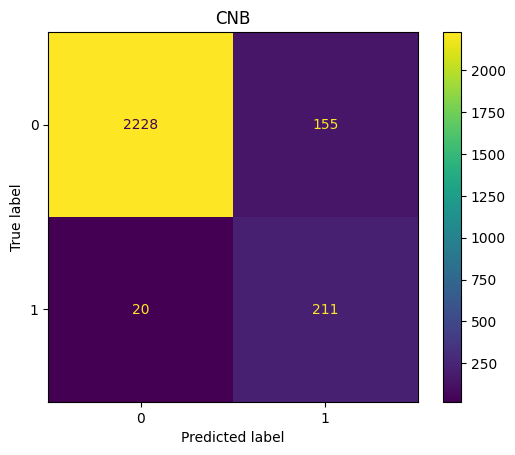

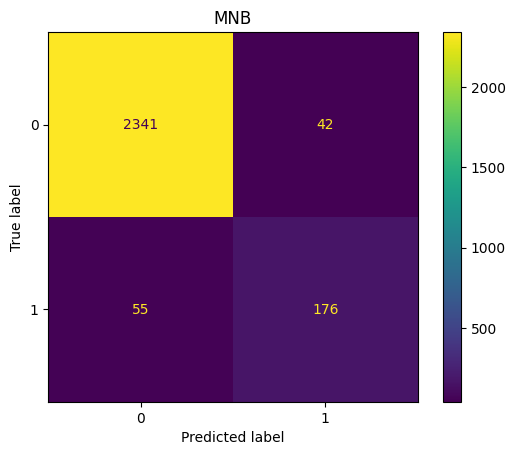

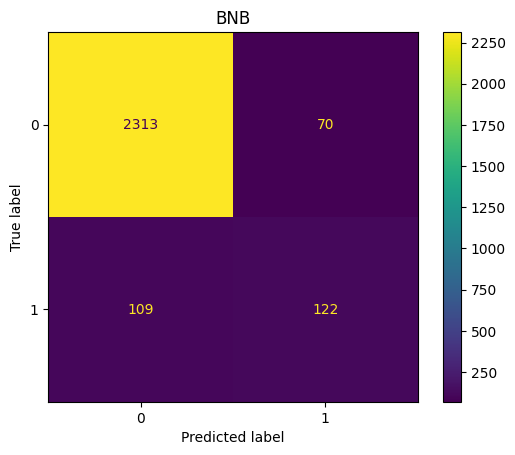

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# I'm assuming CNB, MNB, BNB are your classifier instances and X_test, y_test are your test data
k = [CNB, MNB, BNB]
classifier_names = ["CNB", "MNB", "BNB"]  # Names for the classifiers for display purposes

for classifier, name in zip(k, classifier_names):
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create the ConfusionMatrixDisplay instance
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Use the plotting method
    disp.plot()
    plt.title(name)
    plt.show()


0.9562312774650163 0.9562412688724061 0.9482481429606902


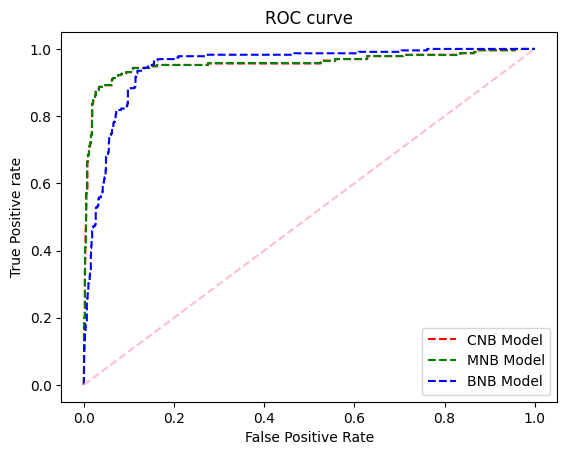

In [42]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(df['stemming'])

In [25]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, df['label'],test_size=0.20,random_state=30)

In [26]:
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy score multinomial naive bayes = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy score multinomial naive bayes = 94.84%


In [34]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in df["stemming"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,aplikasi,4068
1,buka,1571
2,login,1505
3,masuk,1392
4,baik,1190
5,kartu,1161
6,starbucks,1101
7,email,1019
8,daftar,912
9,coba,889


In [35]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)